# 신경망을 이용한 구조

In [21]:
import pandas as pd
import tensorflow as tf
# tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np

In [24]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(xtrain, ytrain), (xtest, ytest)= tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


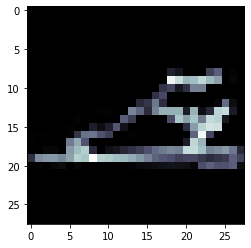

In [18]:
xtrain.shape
plt.imshow(xtrain[300], plt.cm.bone)

In [19]:
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

train -> 훈련 -> 모델  
test ----------> 입력 -> 분류 결과(yhat)  
                            정답(ytest)  
정확도는 ?   

In [25]:
xtrain=xtrain.reshape(60000,784).astype('float32')/255.0
xtest=xtest.reshape(10000,784).astype('float32')/255.0
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [26]:
model = Sequential()
model.add(Dense(units =2, input_dim = 28*28, activation= 'relu')) #래이어 설계, 입력데이터의 차원
# 입력 =784, 출력=2인 레이어 추가 

model.add(Dense(units =10, activation= 'softmax'))

In [27]:
# 3번 모델 학습과정 설정 
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy']) # loss == cost
hist = model.fit(xtrain, ytrain, batch_size=32,  epochs=50)

Epoch 1/50
1875/1875 [==============================] - 1s 640us/step - loss: 2.3027 - accuracy: 0.0940
Epoch 2/50
1875/1875 [==============================] - 1s 666us/step - loss: 2.3027 - accuracy: 0.0995
Epoch 3/50
1875/1875 [==============================] - 1s 657us/step - loss: 2.3027 - accuracy: 0.0981
Epoch 4/50
1875/1875 [==============================] - 1s 641us/step - loss: 2.3027 - accuracy: 0.0976
Epoch 5/50
1875/1875 [==============================] - 1s 634us/step - loss: 2.3027 - accuracy: 0.0986
Epoch 6/50
1875/1875 [==============================] - 1s 639us/step - loss: 2.3027 - accuracy: 0.0997
Epoch 7/50
1875/1875 [==============================] - 1s 612us/step - loss: 2.3027 - accuracy: 0.0967
Epoch 8/50
1875/1875 [==============================] - 1s 598us/step - loss: 2.3027 - accuracy: 0.0984
Epoch 9/50
1875/1875 [==============================] - 1s 645us/step - loss: 2.3027 - accuracy: 0.0985
Epoch 10/50
1875/1875 [==============================] - 1s 642u

In [28]:
yhat = model.predict(xtest[0:1])
yhat # yhat을 모두 더하면, 1이 나옴 왜냐? 확률이기 때문에!
# ytest[0:1]
yhat[0]

array([0.0990862 , 0.10034024, 0.10045258, 0.10033634, 0.10083879,
       0.09909697, 0.10027797, 0.10001377, 0.10028838, 0.09926867],
      dtype=float32)

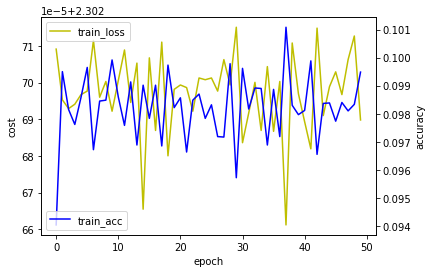

In [30]:
fig, axes = plt.subplots()
accax = axes.twinx() # 윈도우 하나에 여러개 그릴 수 있음
axes.plot(hist.history['loss'], 'y', label = 'train_loss')
# axes.plot(hist.history['val_loss'], 'r', label = 'val_loss')
accax.plot(hist.history['accuracy'], 'b', label = 'train_acc')
# accax.plot(hist.history['val_acc'], 'g', label = 'val_acc')

axes.set_xlabel('epoch')
axes.set_ylabel('cost')
accax.set_ylabel('accuracy')
axes.legend(loc = 'upper left')
accax.legend(loc = 'lower left')